In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from perceptron import *

# Data Processing

In [2]:
#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

In [3]:
#Filtering data-- keeping only labels 
labels_train_indices = []
labels_test_indices = []
for idx, label in enumerate(labels_train):
    if label in [[1], [6]]:
        labels_train_indices.append(idx)
for idx, label in enumerate(labels_test):
    if label in [[1], [6]]:
        labels_test_indices.append(idx)
labels_train_indices = np.array(labels_train_indices)
labels_test_indices = np.array(labels_test_indices)

In [4]:
images_train = images_train[labels_train_indices]
labels_train = labels_train[labels_train_indices]
images_test = images_test[labels_test_indices]
labels_test = labels_test[labels_test_indices]

In [5]:
#just to make all random sequences on all computers the same.
np.random.seed(1)

In [6]:
#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]


inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

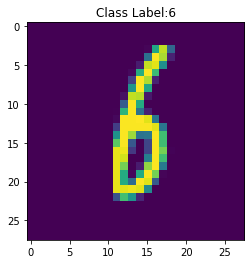

In [7]:
#visually checking that class labels still correspond to images
i= 190
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()

# Getting Perceptron Accuracies

In [8]:
perceptron = Perceptron(images_train, labels_train, images_test[:1000], labels_test[:1000])

In [9]:
accuracies = []
for i in range(1000):
    weight = perceptron.train(i)
    accuracies.append(perceptron.test())

In [10]:
iterations = [i for i in range(1000)]

Text(0.5, 1.0, 'Perceptron Accuracy With Respect to Iterations')

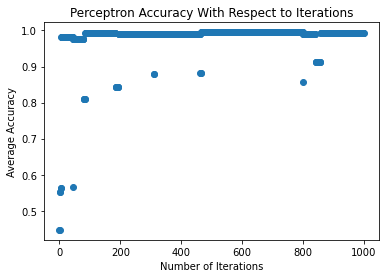

In [11]:
plt.scatter(iterations, accuracies)
plt.xlabel("Number of Iterations")
plt.ylabel("Average Accuracy")
plt.title("Perceptron Accuracy With Respect to Iterations")

# Visualizing Weights

In [12]:
weight_positive = [0]*(len(weight) - 1)
weight_negative = [0] * len(weight_positive)
for i in range(len(weight_positive)):
    if weight[i] > 0:
        weight_positive[i] = weight[i]
    else:
        weight_negative[i] = weight[i]

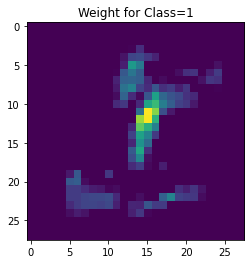

In [13]:
im = np.array(weight_positive).reshape((28,28),order='F')
plt.imshow(im)
plt.title('Weight for Class=1')
plt.show()

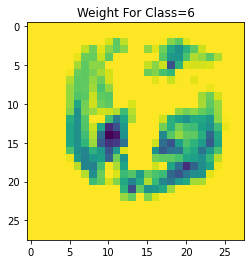

In [14]:
im = np.array(weight_negative).reshape((28,28),order='F')
plt.imshow(im)
plt.title('Weight For Class=6')
plt.show()

# Plotting best and worst scoring images

In [15]:
perceptron.train(1000)
class_1, class_6 = perceptron.get_scores()
class_1.sort(key = lambda x: x[1])
class_6.sort(key = lambda x: x[1])

In [16]:
def plot_20_images(image_dataset, indices, title):
    f, axarr = plt.subplots(4,5)
    f.suptitle(title)    
    for i in range(4):
        for j in range(5):
            idx = indices[4*i + j]
            im = np.array(image_dataset[idx]).reshape((28,28),order='F')
            axarr[i,j].imshow(im)
    for ax in axarr.flat:
        ax.label_outer()

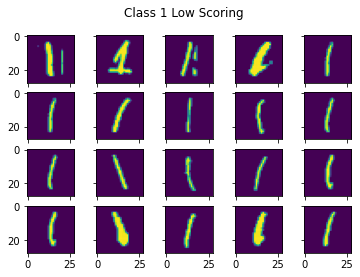

In [17]:
class_1_low = [x[0] for x in class_1][:20]
plot_20_images(images_test, class_1_low, "Class 1 Low Scoring")

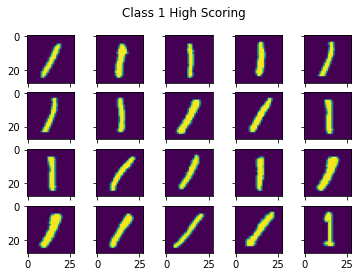

In [18]:
class_1_high = [x[0] for x in class_1][-20:]
plot_20_images(images_test, class_1_high, "Class 1 High Scoring")

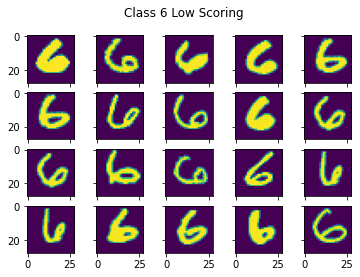

In [19]:
class_6_low = [x[0] for x in class_6][:20]
plot_20_images(images_test, class_6_low, "Class 6 Low Scoring")

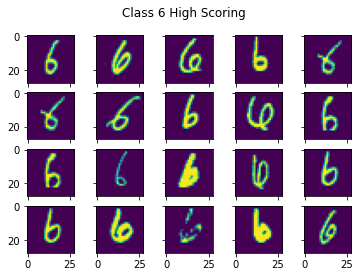

In [20]:
class_6_high = [x[0] for x in class_6][-20:]
plot_20_images(images_test, class_6_high, "Class 6 High Scoring")

# Randomly Flipping Label

In [21]:
num_flip = int(len(images_train) / 10)
rand_flips = np.random.randint(len(images_train), size=num_flip)
for idx in range(len(labels_train)):
    if idx in rand_flips:
        if labels_train[idx] == [1]:
            labels_train[idx] == [6]
        else:
            labels_train[idx] == [1]

In [22]:
perceptron = Perceptron(images_train, labels_train, images_test[:1000], labels_test[:1000])
weight = perceptron.train(1000)

## Getting weights

In [23]:
weight_positive = [0]*(len(weight) - 1)
weight_negative = [0] * len(weight_positive)
for i in range(len(weight_positive)):
    if weight[i] > 0:
        weight_positive[i] = weight[i]
    else:
        weight_negative[i] = weight[i]

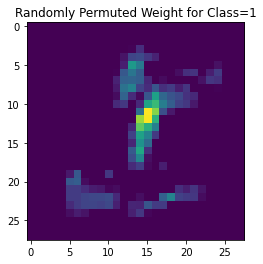

In [24]:
im = np.array(weight_positive).reshape((28,28),order='F')
plt.imshow(im)
plt.title('Randomly Permuted Weight for Class=1')
plt.show()

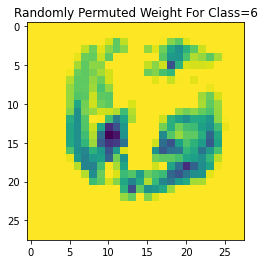

In [25]:
im = np.array(weight_negative).reshape((28,28),order='F')
plt.imshow(im)
plt.title('Randomly Permuted Weight For Class=6')
plt.show()

## Getting scores

In [26]:
class_1, class_6 = perceptron.get_scores()
class_1.sort(key = lambda x: x[1])
class_6.sort(key = lambda x: x[1])

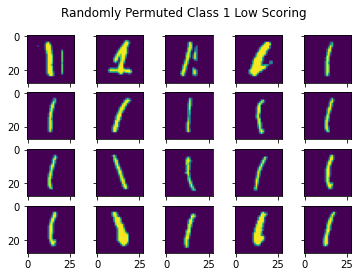

In [27]:
class_1_low = [x[0] for x in class_1][:20]
plot_20_images(images_test, class_1_low, "Randomly Permuted Class 1 Low Scoring")

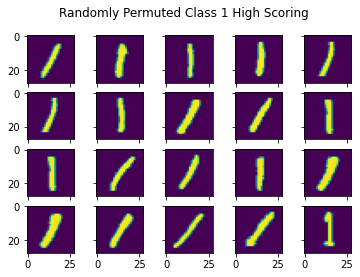

In [28]:
class_1_high = [x[0] for x in class_1][-20:]
plot_20_images(images_test, class_1_high, "Randomly Permuted Class 1 High Scoring")

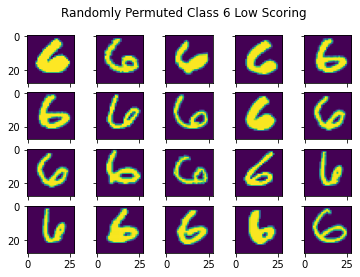

In [29]:
class_6_low = [x[0] for x in class_6][:20]
plot_20_images(images_test, class_6_low, "Randomly Permuted Class 6 Low Scoring")

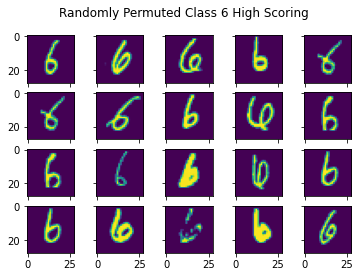

In [30]:
class_6_high = [x[0] for x in class_6][-20:]
plot_20_images(images_test, class_6_high, "Randomly Permuted Class 6 High Scoring")

# Sorting the data before training

In [31]:
train_1 = []
train_6 = []
label_1 = []
label_6 = []
for i in range(len(images_train)):
    if labels_train[i] == [1]:
        train_1.append(images_train[i])
        label_1.append(labels_train[i])
    else:
        train_6.append(images_train[i])
        label_6.append(labels_train[i])

In [32]:
sorted_train = np.array(train_1 + train_6)
sorted_label = np.array(label_1 + label_6)

In [33]:
perceptron = Perceptron(sorted_train, sorted_label, images_test[:1000], labels_test[:1000])

In [34]:
accuracies = []
for i in range(1000):
    weight = perceptron.train(i)
    accuracies.append(perceptron.test())

Text(0.5, 1.0, 'Perceptron Accuracy With Respect to Iterations (Sorted Training Data)')

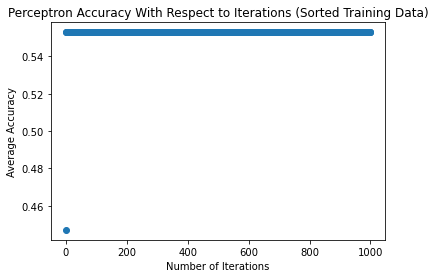

In [35]:
iterations = [i for i in range(1000)]
plt.scatter(iterations, accuracies)
plt.xlabel("Number of Iterations")
plt.ylabel("Average Accuracy")
plt.title("Perceptron Accuracy With Respect to Iterations (Sorted Training Data)")

# Using 10 training examples per class

In [36]:
train_10 = np.array(train_1[:10] + train_6[:10])
label_10 = np.array(label_1[:10] + label_6[:10])
inds = np.random.permutation(train_10.shape[0])
train_10 = train_10[inds]
label_10 = label_10[inds]

In [37]:
perceptron = Perceptron(train_10, label_10, images_test[:1000], labels_test[:1000])

In [38]:
accuracies_10 = []
for i in range(20):
    weight = perceptron.train(i)
    accuracies_10.append(perceptron.test())

Text(0.5, 1.0, 'Perceptron Accuracy With 10 Examples Per Class')

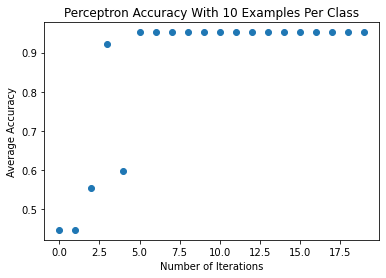

In [39]:
iterations = [i for i in range(1000)]
plt.scatter(iterations[:20], accuracies_10)
plt.xlabel("Number of Iterations")
plt.ylabel("Average Accuracy")
plt.title("Perceptron Accuracy With 10 Examples Per Class")